<!-- dom:TITLE: PHY321: Introduction to Classical Mechanics and plans for Spring 2020 -->
# PHY321: Introduction to Classical Mechanics and plans for Spring 2020
<!-- dom:AUTHOR: [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/) at Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, USA & Department of Physics, University of Oslo, Norway -->
<!-- Author: -->  
**[Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/)**, Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, USA and Department of Physics, University of Oslo, Norway  
<!-- dom:AUTHOR: [Scott Pratt](https://pa.msu.edu/profile/pratts/) at Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, USA -->
<!-- Author: --> **[Scott Pratt](https://pa.msu.edu/profile/pratts/)**, Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University, USA  
<!-- dom:AUTHOR: [Carl Schmidt](https://pa.msu.edu/profile/schmidt/) at Department of Physics and Astronomy, Michigan State University, USA -->
<!-- Author: --> **[Carl Schmidt](https://pa.msu.edu/profile/schmidt/)**, Department of Physics and Astronomy, Michigan State University, USA

Date: **Jan 22, 2020**

Copyright 1999-2020, [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/). Released under CC Attribution-NonCommercial 4.0 license




## Introduction

Classical mechanics is a topic which has been taught intensively over
several centuries. It is, with its many variants and ways of
presenting the educational material, normally the first **real** physics
course many of us meet and it lays the foundation for further physics
studies. Many of the equations and ways of reasoning about the
underlying laws of motion and pertinent forces, shape our approaches and understanding
of the scientific method and discourse, as well as the way we develop our insights
and deeper understanding about physical systems.  

There is a wealth of
well-tested (from both a physics point of view and a pedagogical
standpoint) exercises and problems which can be solved
analytically. However, many of these problems represent idealized and
less realistic situations.  The large majority of these problems are
solved by paper and pencil and are traditionally aimed
at what we normally refer to as continuous models from which we may find an analytical solution.  As a consequence,
when teaching mechanics, it implies that we can seldomly venture beyond an idealized case
in order to develop our understandings and insights about the
underlying forces and laws of motion.

## Numerical Elements
On the other hand, numerical algorithms call for approximate discrete
models and much of the development of methods for continuous models
are nowadays being replaced by methods for discrete models in science and
industry, simply because **much larger classes of problems can be addressed** with discrete models, often  by simpler and more
generic methodologies.

As we will see below, when properly scaling the equations at hand,
discrete models open up for more advanced abstractions and the possibility to
study  real life systems, with the added bonus that we can explore and
deepen our basic understanding of various physical systems

Analytical solutions are as important as before. In addition, such
solutions provide us with invaluable benchmarks and tests for our
discrete models. Such benchmarks, as we will see below, allow us 
to discuss possible sources of errors and their behaviors.  And
finally, since most of our models are based on various algorithms from
numerical mathematics, we have a unique oppotunity to gain a deeper
understanding of the mathematical approaches we are using.



With computing and data science as important elements in essentially
all aspects of a modern society, we could  then try to define Computing as
**solving scientific problems using all possible tools, including
symbolic computing, computers and numerical algorithms, and analytical
paper and pencil solutions**. 
Computing provides us with the tools to develope our own understanding of the scientific method by enhancing algorithmic thinking.

## Computations and the Scientific Method

The way we will teach this course reflects
this definition of computing. The course contains both classical paper
and pencil exercises as well as  computational projects and exercises. The
hope is that this will allow you to explore the physics of systems
governed by the degrees of freedom of classical mechanics at a deeper
level, and that these insights about the scientific method will help
you to develop a better understanding of how the underlying forces and
equations of motion and how they impact a given system. Furthermore, by introducing various numerical methods
via computational projects and exercises, we aim at developing your competences and skills about these topics.


These competences will enable you to

* understand how algorithms are used to solve mathematical problems,

* derive, verify, and implement algorithms,

* understand what can go wrong with algorithms,

* use these algorithms to construct reproducible scientific outcomes and to engage in science in ethical ways, and

* think algorithmically for the purposes of gaining deeper insights about scientific problems.

All these elements are central for maturing and gaining a better understanding of the modern scientific process *per se*.

The power of the scientific method lies in identifying a given problem
as a special case of an abstract class of problems, identifying
general solution methods for this class of problems, and applying a
general method to the specific problem (applying means, in the case of
computing, calculations by pen and paper, symbolic computing, or
numerical computing by ready-made and/or self-written software). This
generic view on problems and methods is particularly important for
understanding how to apply available, generic software to solve a
particular problem.

*However, verification of algorithms and understanding their limitations requires much of the classical knowledge about continuous models.*


## A well-known examples to illustrate many of the above concepts

Before we venture into a reminder on Python and mechanics relevant applications, let us briefly outline some of the
abovementioned topics using an example many of you may have seen before in for example CMSE201. 
A simple algorithm for integration is the Trapezoidal rule. 
Integration of a function $f(x)$ by the Trapezoidal Rule is given by following algorithm for an interval $x \in [a,b]$

$$
\int_a^b(f(x) dx = \frac{1}{2}\left [f(a)+2f(a+h)+\dots+2f(b-h)+f(b)\right] +O(h^2),
$$

where $h$ is the so-called stepsize defined by the number of integration points $N$ as $h=(b-a)/(n)$.
Python offers an  extremely versatile programming  environment, allowing for
the inclusion of analytical studies in a numerical program. Here we show an
example code with the **trapezoidal rule**. We use also **SymPy** to evaluate the exact value of the integral and compute the absolute error
with respect to the numerically evaluated one of the integral
$\int_0^1 dx x^2 = 1/3$.
The following code for  the trapezoidal rule allows you  to plot the relative error by comparing with the exact result. By increasing to $10^8$ points one arrives at a region where numerical errors start to accumulate.

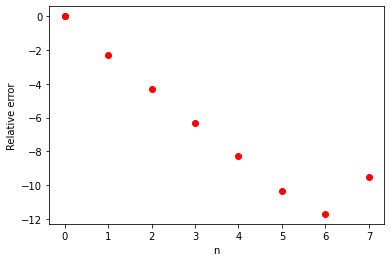

In [1]:
%matplotlib inline

from math import log10
import numpy as np
from sympy import Symbol, integrate
import matplotlib.pyplot as plt
# function for the trapezoidal rule
def Trapez(a,b,f,n):
   h = (b-a)/float(n)
   s = 0
   x = a
   for i in range(1,n,1):
       x = x+h
       s = s+ f(x)
   s = 0.5*(f(a)+f(b)) +s
   return h*s
#  function to compute pi
def function(x):
    return x*x
# define integration limits
a = 0.0;  b = 1.0;
# find result from sympy
# define x as a symbol to be used by sympy
x = Symbol('x')
exact = integrate(function(x), (x, a, b))
# set up the arrays for plotting the relative error
n = np.zeros(9); y = np.zeros(9);
# find the relative error as function of integration points
for i in range(1, 8, 1):
    npts = 10**i
    result = Trapez(a,b,function,npts)
    RelativeError = abs((exact-result)/exact)
    n[i] = log10(npts); y[i] = log10(RelativeError);
plt.plot(n,y, 'ro')
plt.xlabel('n')
plt.ylabel('Relative error')
plt.show()

## Analyzing the above example
This example shows the potential of combining numerical algorithms with symbolic calculations, allowing us to 

* Validate and verify  their  algorithms. 

* Including concepts like unit testing, one has the possibility to test and test several or all parts of the code.

* Validation and verification are then included *naturally* and one can develop a better attitude to what is meant with an ethically sound scientific approach.

* The above example allows the student to also test the mathematical error of the algorithm for the trapezoidal rule by changing the number of integration points. The students get **trained from day one to think error analysis**. 

* With a Jupyter notebook you can keep exploring similar examples and turn them in as your own notebooks. 

In this process we can easily bake in
1. How to structure a code in terms of functions

2. How to make a module

3. How to read input data flexibly from the command line

4. How to create graphical/web user interfaces

5. How to write unit tests (test functions or doctests)

6. How to refactor code in terms of classes (instead of functions only)

7. How to conduct and automate large-scale numerical experiments

8. How to write scientific reports in various formats (LaTeX, HTML)

The conventions and techniques outlined here will save you a lot of time when you incrementally extend software over time from simpler to more complicated problems. In particular, you will benefit from many good habits:
1. New code is added in a modular fashion to a library (modules)

2. Programs are run through convenient user interfaces

3. It takes one quick command to let all your code undergo heavy testing 

4. Tedious manual work with running programs is automated,

5. Your scientific investigations are reproducible, scientific reports with top quality typesetting are produced both for paper and electronic devices.

## Teaching team, grading and other practicalities



<table border="1">
<thead>
<tr><th align="center">     Lectures     </th> <th align="center">                     </th> <th align="center">                  </th> <th align="center">   Location  </th> </tr>
</thead>
<tbody>
<tr><td align="left">   Monday 3:00-3:50pm    </td> <td align="left">   Wednesday 3:00-3:50pm    </td> <td align="left">   Friday 3:00-3:50pm    </td> <td align="left">   Room 1420 BPS    </td> </tr>
</tbody>
</table>
<table border="1">
<thead>
<tr><th align="center">                     Instructor                    </th> <th align="center">     Email     </th> <th align="center">        Office        </th> <th align="center">Office phone/cellphone</th> </tr>
</thead>
<tbody>
<tr><td align="left">   [Morten Hjorth-Jensen](https://github.com/mhjensen)    </td> <td align="left">   hjensen@msu.edu    </td> <td align="left">   Office: NSCL/FRIB 2131    </td> <td align="left">   5179087290/5172491375     </td> </tr>
</tbody>
</table>
<table border="1">
<thead>
<tr><th align="center">                 Office Hours                 </th> <th align="center">                          </th> </tr>
</thead>
<tbody>
<tr><td align="left">   Monday/Wednesday 4-5:00pm, Room 2131 NSCL/FRIB    </td> <td align="left">   or immediately after class    </td> </tr>
</tbody>
</table>
<table border="1">
<thead>
<tr><th align="center">Homework Grader </th> <th align="center">     Email      </th> </tr>
</thead>
<tbody>
<tr><td align="left">   Kasun Senanayaka    </td> <td align="left">   senanaya@msu.edu    </td> </tr>
</tbody>
</table>

<table border="1">
<thead>
<tr><th align="center">Learning Assistant</th> <th align="center">     Email      </th> </tr>
</thead>
<tbody>
<tr><td align="left">   Dylan R. Smith        </td> <td align="left">   smithdy6@msu.edu    </td> </tr>
</tbody>
</table>
<table border="1">
<thead>
<tr><th align="center">               Office Hours Dylan Smith              </th> <th align="center">                                    </th> </tr>
</thead>
<tbody>
<tr><td align="center">   Tuesday/Thursday 1-2:00pm, Physics Help Room BPS 1248    </td> <td align="center">   or immediately after class on Friday    </td> </tr>
</tbody>
</table>

## Grading and dates

<table border="1">
<thead>
<tr><th align="center">                        Activity                        </th> <th align="center">Percentage of total score</th> </tr>
</thead>
<tbody>
<tr><td align="left">   Homeworks, 10 in total and due Wednesdays the week after    </td> <td align="left">   20%                          </td> </tr>
<tr><td align="left">   First Midterm Project, due Friday February 28               </td> <td align="left">   25%                          </td> </tr>
<tr><td align="left">   Second  Midterm Project, due Friday April 10                </td> <td align="left">   25%                          </td> </tr>
<tr><td align="left">   Final Exam, April 29, 5:45-7:45pm                           </td> <td align="left">   30%                          </td> </tr>
<tr><td align="left">   Extra Credit Assignment (Due Friday April 24)               </td> <td align="left">   10%                          </td> </tr>
</tbody>
</table>

<table border="1">
<thead>
<tr><th align="center">Grading scale</th> <th align="center">        </th> <th align="center">        </th> <th align="center">        </th> <th align="center">        </th> <th align="center">        </th> <th align="center">        </th> </tr>
</thead>
<tbody>
<tr><td align="left">   4.0(90%)         </td> <td align="left">   3.5(80%)    </td> <td align="left">   3.0(70%)    </td> <td align="left">   2.5(60%)    </td> <td align="left">   2.0(50%)    </td> <td align="left">   1.5(40%)    </td> <td align="left">   1.0(30%)    </td> </tr>
</tbody>
</table>

## Possible textbooks and lecture notes

**Recommended textbook**:
* [John R. Taylor, Classical Mechanics (Univ. Sci. Books 2005)](https://www.uscibooks.com/taylor2.htm), see also [the GitHub link of the course](https://github.com/mhjensen/Physics321/tree/master/doc/Literature)

**Additional textbooks**:
* [Anders Malthe-SÃ¸renssen, Elementary Mechanics using Python (Springer 2015)](https://www.springer.com/gp/book/9783319195957) and [the GitHub link of the course](https://github.com/mhjensen/Physics321/tree/master/doc/Literature)

* [Alessandro Bettini, A Course in Classical Physics 1, Mechanics (Springer 2017)](https://www.springer.com/gp/book/9783319292564) and the [GitHub link of the course](https://github.com/mhjensen/Physics321/tree/master/doc/Literature).

The books from Springer can be downloaded for free (pdf or ebook format) from any MSU IP address. 

**Lecture notes**:
Posted lecture notes are in the doc/pub folder here or at <https://mhjensen.github.io/Physics321/doc/web/course.html> for easier viewing. They are not meant to be a replacement for textbook. These notes are updated on a weekly basis and a **git pull** should thus always give you the latest update.


```{toctree}
:hidden:
:titlesonly:
:numbered: 

chapter2
chapter3
chapter4
```
